In [2]:
!pip install ucimlrepo

In [14]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

In [16]:
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
   
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
print(predict_students_dropout_and_academic_success.metadata) 
print(predict_students_dropout_and_academic_success.variables)

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [20]:
print("First 5 rows of feature data (X):")
print(X.head())

print("\nFirst 5 rows of target data (y):")
print(y.head())

print("\nSummary of feature data (X):")
print(X.describe())

print("\nMissing values per feature:")
print(X.isnull().sum())

print("\nTarget distribution:")
print(y['Target'].value_counts())

target_counts = y['Target'].value_counts(normalize=True) * 100
print("\nTarget distribution percentages:")
print(np.round(target_counts, 2))


First 5 rows of feature data (X):
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2   

In [24]:
X.fillna(X.mean(), inplace=True)

for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

# Verify the changes
print("\nData types after conversion:")
print(X.dtypes)
print("\nMissing values after filling:")
print(X.isnull().sum())



Data types after conversion:
Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                   

C:\Users\mraml\AppData\Local\Temp\ipykernel_2720\3649464861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


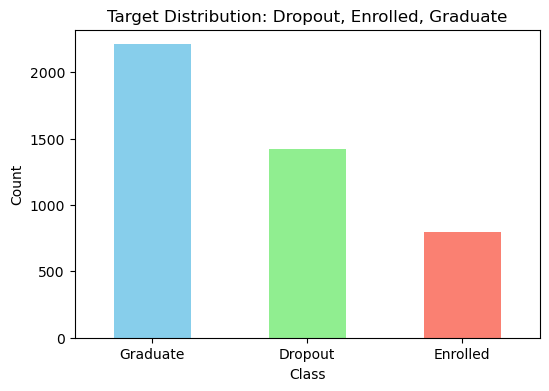

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
y['Target'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Target Distribution: Dropout, Enrolled, Graduate")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()